<p><img alt="UNQ logo" height="45px" src="http://www.unq.edu.ar/images/logo_unqui_footer.png" align="left" hspace="10px" vspace="0px"></p><h1>Redes Neuronales y Lógica Difusa</h1>

# Aprendizaje no supervisado

## Ejemplo de K-means

### Ejemplo de K-means a mano

Importo módulos a utilizar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import KMeans

Construyo dataset con 3 clusters

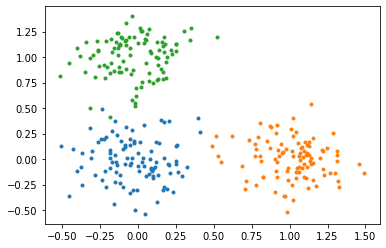

In [ ]:
mu1 = np.array([[0], [0]])
mu2 = np.array([[1], [0]])
mu3 = np.array([[0], [1]])
N = 100

x1 = mu1 * np.ones((1, N)) + 0.2 * np.random.randn(2, N)
x2 = mu2 * np.ones((1, N)) + 0.2 * np.random.randn(2, N)
x3 = mu3 * np.ones((1, N)) + 0.2 * np.random.randn(2, N)

f1 = plt.figure(1)
plt.plot(x1[0,:], x1[1,:], '.')
plt.plot(x2[0,:], x2[1,:], '.')
plt.plot(x3[0,:], x3[1,:], '.')
f1.show()

Inicializo

In [ ]:
X = np.append(np.append(x1, x2, axis = 1), x3, axis = 1)
X = X.transpose()
[n,d] = np.shape(X)

# Defino el número de clusters
k = 3

# Permuto los distintos elementos al azar
ind = np.random.permutation(n)

# Elijo los primeros 3 puntos al azar y los defino centros
ind = ind[0:k]
nc = X[ind,:]

# Preparo el almacenamiento
# Los enteros 1,...,k indican la pertenencia a un cluster
cid = np.zeros(n)
# Hago el arreglo oldcid distinto a cid así en el primer loop no son iguales
oldcid = np.ones(n)
# Almaceno la cantidad de elementos en cada cluster
nr = np.zeros(k)
dist = np.zeros(k)
distot = []

# Defino la cantidad máxima de iteraciones
maxiter = 100

Itera mientras los centros cambian y no llegue a maxiter

In [ ]:
iter = 0
while (~(cid == oldcid).all() and (iter < maxiter)):
  # Igualo oldcid a cid
  oldcid = list(cid)  # Si no hago la copia así e igualo directamente, oldcid va a estar referenciado a cid

  # Implemento el método k-means. Para cada punto busco la distancia a cada centro de cluster
  distot.append(0)
  # Recorro cada punto
  for i in range(n):
    # dist es la distancia cuad de punto 'i' a cada centro 'n1' 
    for n1 in range(k):
      dist[n1] = np.sum((X[i,:] - nc[n1,:])**2)
    
    # Busco la distancia menor
    val,ind = dist.min(0),dist.argmin(0)
    cid[i] = ind # Asigno esa clase a cid
    distot[-1] = distot[-1] + val # Suma total J

  # Encuentro los nuevos centros de cluster
  for i in range(k):
      # Busco puntos que pertencen a cluster 'i'.
      ind = np.argwhere(cid == i)
      # Calculo CG 'i'
      nc[i,:] = np.mean(X[ind,:], axis = 0)
      # Guardo la cantidad de elementos en cada cluster
      nr[i] = len(ind)
  iter = iter + 1

Muestro resultados

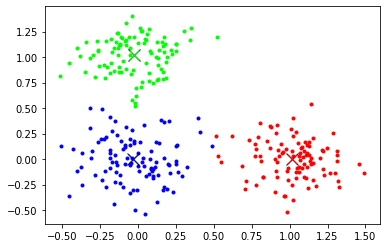

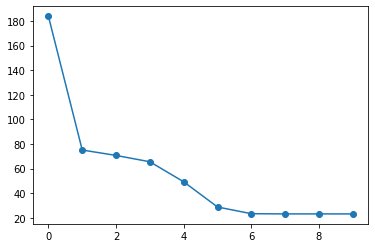

In [ ]:
f3 = plt.figure(3)

# Pinto de color cada cluster clasificado
for i in range(k):
  # Busco todos los puntos en este cluster
  ind = np.argwhere(cid == i)
  # Encuentro el centroide
  nc[i,:] = np.mean(X[ind,:], axis = 0)
  # Guardo el número de elementos en cada cluster
  nr[i] = len(ind)

  if(i == 0):
    vcolor = [1, 0, 0]
  if(i == 1):
    vcolor = [0, 1, 0]
  if(i == 2):
    vcolor = [0, 0, 1]
  plt.plot(X[ind, 0], X[ind, 1], 'o', c = vcolor, markersize = 3)
  plt.plot(nc[i,0], nc[i,1], 'x', c = 'black', markersize = 12)
  plt.plot(nc[i,0], nc[i,1], 'x', c = vcolor, markersize = 10)

# Grafico J
f2 = plt.figure(2)

plt.plot(distot,'o-', label = 'Dist. Cuadratica Total')
f2.show()

### Ejemplo de K-means con módulo

Importo los módulos a utilizar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Inicializo variables y genero datos

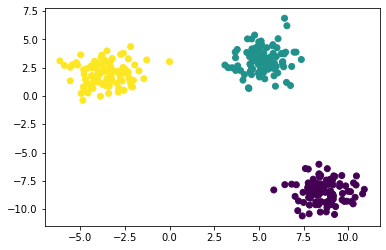

In [ ]:
N_clusters = 3
N_muestras = 300
N_maxIter = 100
X, y = make_blobs(n_samples = N_muestras, centers = N_clusters)
f1 = plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c = y)
f1.show()

Ejecuto el algoritmo de k-means

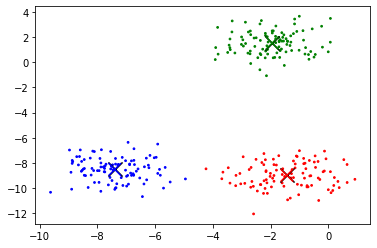

In [ ]:
varKmeans = KMeans(n_clusters = N_clusters, max_iter = N_maxIter).fit(X)
y_pred = varKmeans.predict(X)
centroides = varKmeans.cluster_centers_

colores=['red','green','blue']
asignar=[]
for row in y_pred:
    asignar.append(colores[row])

f2 = plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=asignar, s = 3)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', c='black', s = 200)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', c=colores, s = 160)
f2.show()

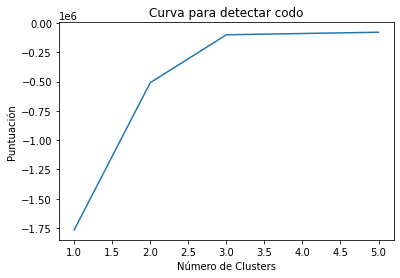

In [ ]:
Nc = range(1, 6)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.title('Curva para detectar codo')
plt.show()

## Ejemplo de C-means

### Ejemplo de C-means con módulo [***Scikit-Fuzzy***](https://pythonhosted.org/scikit-fuzzy)

En particular vamos a usar de este módulo las funciones para realizar el algoritmo [C-means](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html#:~:text=Fuzzy%20c%2Dmeans%20clustering,assigned%20a%20crisp%2C%20exact%20label)

In [ ]:
!python -m pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=088a1b3b772da06b59cd3a0e84d89ae1d4039bbb459dcacf2096b62010adcd4b
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


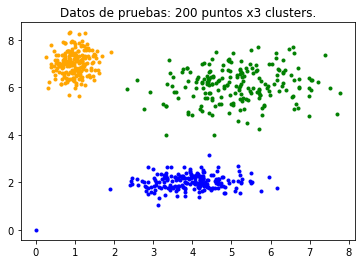

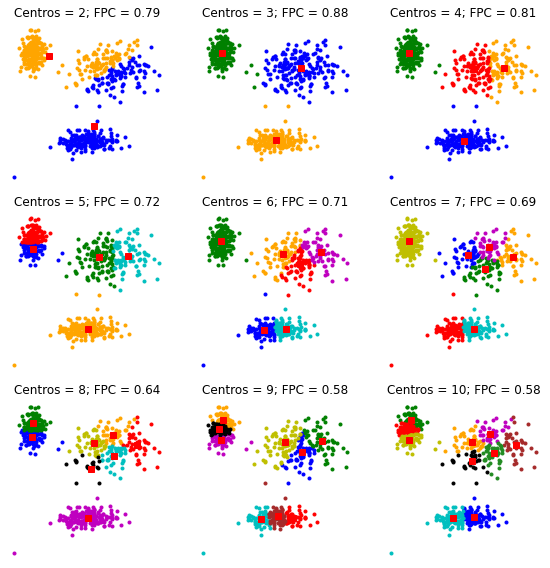

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Defino 3 centros de clusters
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Defino los sigmas de x e y de los 3 clusters
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Genero datos random
np.random.seed(42)  # Establezco una semilla para poder reproducir nuevamente el mismo ejemplo
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualizo los datos de testeo
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Datos de pruebas: 200 puntos x3 clusters.')


# Armo el bucle y grafico
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Guardo los valores fpc para después
    fpcs.append(fpc)

    # Graficos de asignación a los clústers, por cada punto de los datos de entrenamiento
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Marco el centro de cada clúster difuso
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centros = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Fuzzy partition coefficient (FPC)

El FPC varía entre 0 y 1. Es un muy buen indicador para determinar qué tan bien nuestros datos pueden ser definidos por un modelo en particular.

Text(0, 0.5, 'Fuzzy partition coefficient')

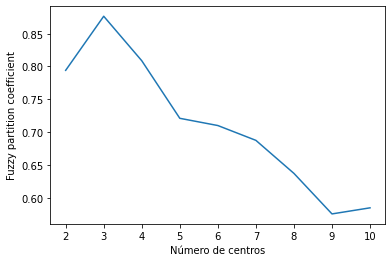

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Número de centros")
ax2.set_ylabel("Fuzzy partition coefficient")

### Ejemplo de C-means con módulo alternativo

Instalo del módulo [fuzzy-c-means](https://pypi.org/project/fuzzy-c-means/)

In [ ]:
!python -m pip install fuzzy-c-means

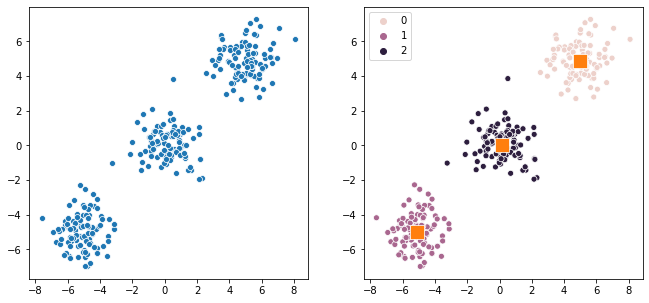

In [ ]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter


# Creo un dataset de prueba
n_samples = 300
centers = [(-5, -5), (0, 0), (5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

# Hago el fiteo del modelo fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)

# Salidas
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# Grafico los resultados

f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
f.show()